In [1]:
!pip install -qU huggingface-hub==0.23.4 Pillow==10.0.1 deepdanbooru==1.0.2 onnxruntime==1.17.3 numpy==1.26.4 opencv-python==4.9.0.80 transformers==4.42.3 bitsandbytes

# BLIP

- Bootstrapping Language-Image Pre-training

- The BLIP image captioning model uses an exceptional deep learning technique to interpret an image into a descriptive caption. It also effortlessly generates image-to-text with high accuracy using natural language processing and computer vision. You can explore this model with several key features

### 1. Importing Libraries:

- torch: This is the main library for PyTorch, a framework used for deep learning.
- BlipProcessor and BlipForConditionalGeneration: These are specific components from the Transformers library by Hugging Face. BlipProcessor handles the preprocessing of inputs and BlipForConditionalGeneration is the model used for generating captions.

In [2]:
import torch
from transformers import BlipProcessor, BlipForConditionalGeneration

C:\Users\MengChieh\Miniconda3\envs\llm_examples\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### 2. Setting the Model Name and Device:

- hf_model: This variable stores the name of the pre-trained BLIP model we want to use.
- device: This determines whether the code will run on a GPU ('cuda') or a CPU ('cpu'). If a GPU is available, it will be used for faster computation.

In [3]:
hf_model = "Salesforce/blip-image-captioning-large"
device = 'cuda' if torch.cuda.is_available() else 'cpu'

### 3. Loading the Processor and Model:
    
- processor: This line loads the pre-trained BLIP processor for handling inputs.An image processor is in charge of preparing input features for vision models and post processing their outputs. This includes transformations such as resizing, normalization, and conversion to PyTorch, TensorFlow, Flax and Numpy tensors. It may also include model specific post-processing such as converting logits to segmentation masks.
- model: This line loads the pre-trained BLIP model and moves it to the specified device (either GPU or CPU).

In [4]:
processor = BlipProcessor.from_pretrained(hf_model)
model = BlipForConditionalGeneration.from_pretrained(hf_model).to(device)

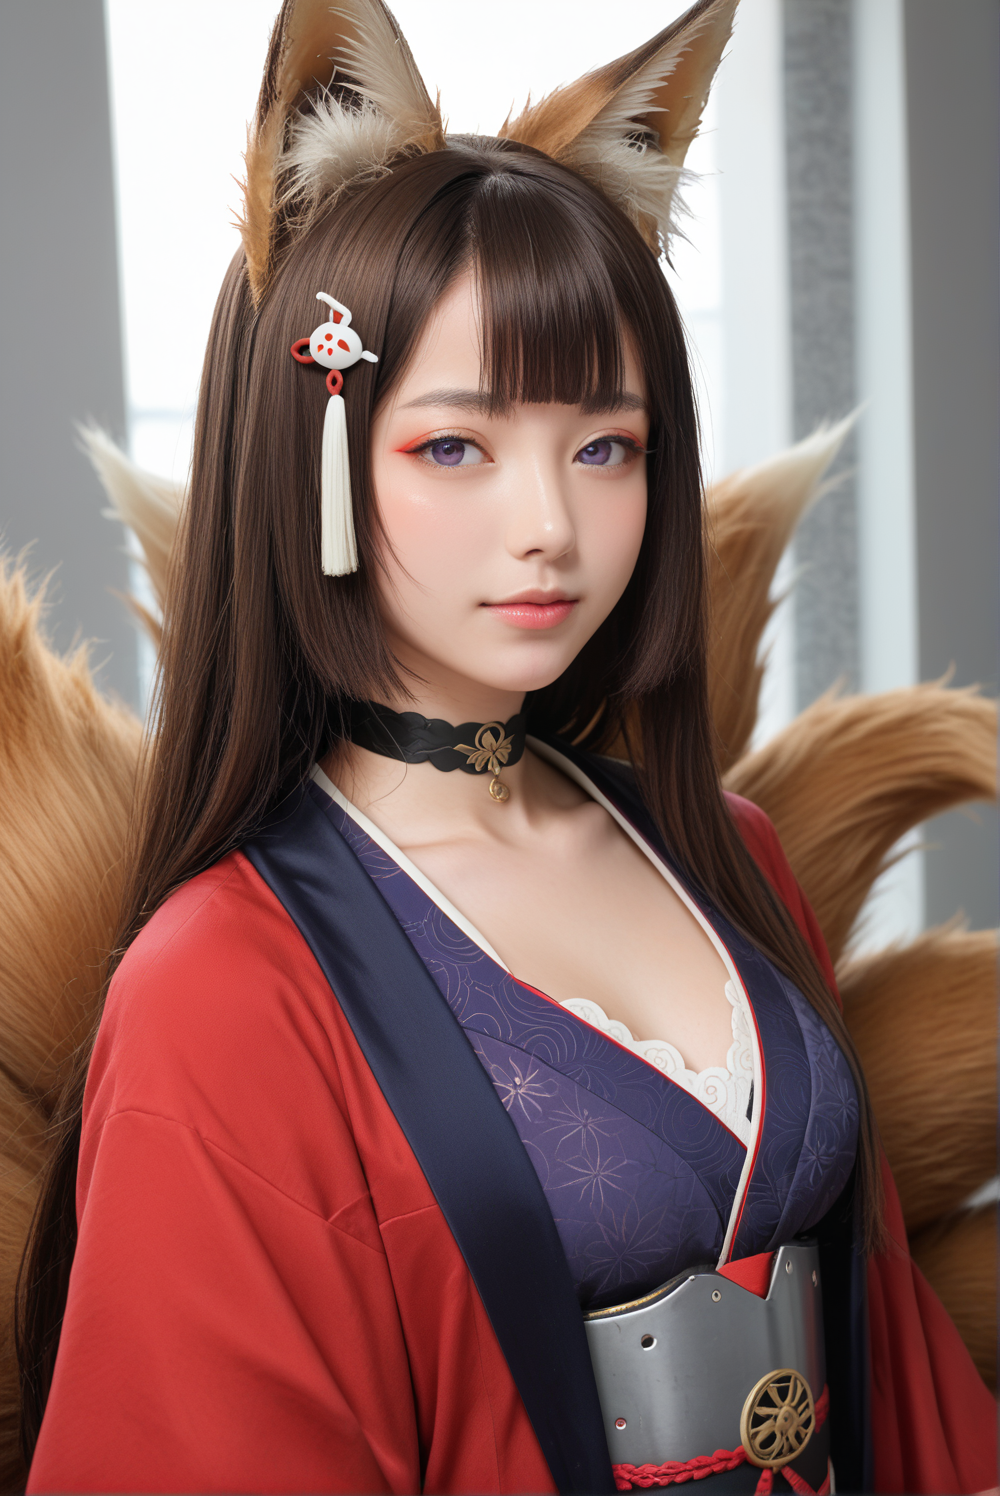

In [5]:
from IPython.display import Image as Image_Ipython

Image_Ipython('754703591882697477.png', width=500, height=750)

### 4. Opening and Converting the Image:

- Image.open("yghzBMOFHZRKGvRuw6AM6.png"): This line opens the image file named "yghzBMOFHZRKGvRuw6AM6.png". The Image class comes from the PIL (Python Imaging Library) or its more modern fork, Pillow.
- .convert('RGB'): This converts the image to RGB mode, ensuring that it has three color channels (Red, Green, Blue). This is necessary because many image models expect RGB images.

In [6]:
import os

os.chdir("../../")

from src.io.path_definition import get_project_dir

In [7]:
from PIL import Image

image = Image.open(os.path.join(get_project_dir(), "tutorial", "Week-5", "754703591882697477.png")).convert('RGB')

### 5. Processing the Image:

- processor(image, return_tensors="pt"): This line uses the BlipProcessor to process the image. The return_tensors="pt" argument specifies that the processed outputs should be returned as PyTorch tensors.
- .to(device): This moves the processed tensors to the specified device (either GPU or CPU), ensuring that subsequent computations are performed on the same device as the model.

In [8]:
text = "a photography of"
inputs = processor(image, text, return_tensors="pt").to(device)

In [9]:
inputs

{'pixel_values': tensor([[[[ 0.2077,  0.2223,  0.2223,  ..., -0.3470, -0.3616, -0.4054],
          [ 0.2077,  0.2223,  0.2223,  ..., -0.3470, -0.3616, -0.3908],
          [ 0.2223,  0.2223,  0.2369,  ..., -0.3324, -0.3470, -0.3762],
          ...,
          [-1.3251, -1.3105, -1.3251,  ...,  0.0471,  0.0471, -0.0405],
          [-1.2813, -1.2813, -1.2813,  ...,  0.4705,  0.3975,  0.2515],
          [-1.2083, -1.2229, -1.2083,  ...,  0.5873,  0.5143,  0.3683]],

         [[ 0.3190,  0.3340,  0.3340,  ..., -0.2513, -0.2663, -0.3114],
          [ 0.3340,  0.3340,  0.3340,  ..., -0.2513, -0.2663, -0.3114],
          [ 0.3340,  0.3490,  0.3490,  ..., -0.2363, -0.2513, -0.2963],
          ...,
          [-1.5570, -1.5720, -1.5570,  ..., -1.1518, -0.9867, -0.8366],
          [-1.5420, -1.5420, -1.5270,  ..., -0.3414, -0.3264, -0.4314],
          [-1.4519, -1.4669, -1.4519,  ..., -0.1763, -0.1913, -0.3114]],

         [[ 0.5106,  0.5106,  0.5106,  ..., -0.0582, -0.0724, -0.1009],
          [ 0

### 6. Disabling Gradient Calculation:

- `with torch.no_grad(): This line is used to disable gradient calculation. Gradients are not needed during inference (prediction) and disabling them reduces memory consumption and speeds up computation.

### 7. Generating Captions：

- model.generate(**inputs, max_new_tokens=100): This line uses the model to generate text (a caption) based on the processed image inputs. max_new_tokens=100 specifies the maximum number of tokens (words or subwords) that the model should generate.

### 8. Decoding the Generated Tokens:

- processor.decode(output_ids[0], skip_special_tokens=True): This line decodes the generated token IDs back into a human-readable string (caption). skip_special_tokens=True ensures that special tokens used by the model (like padding or end-of-sequence tokens) are not included in the final caption.

In [10]:
with torch.no_grad():
    output_ids = model.generate(**inputs, max_new_tokens=100)
    # get the caption
    caption = processor.decode(output_ids[0], skip_special_tokens=True)

In [11]:
caption

'a photography of a woman with a cat ear and a red kimono'

# BLIP-2

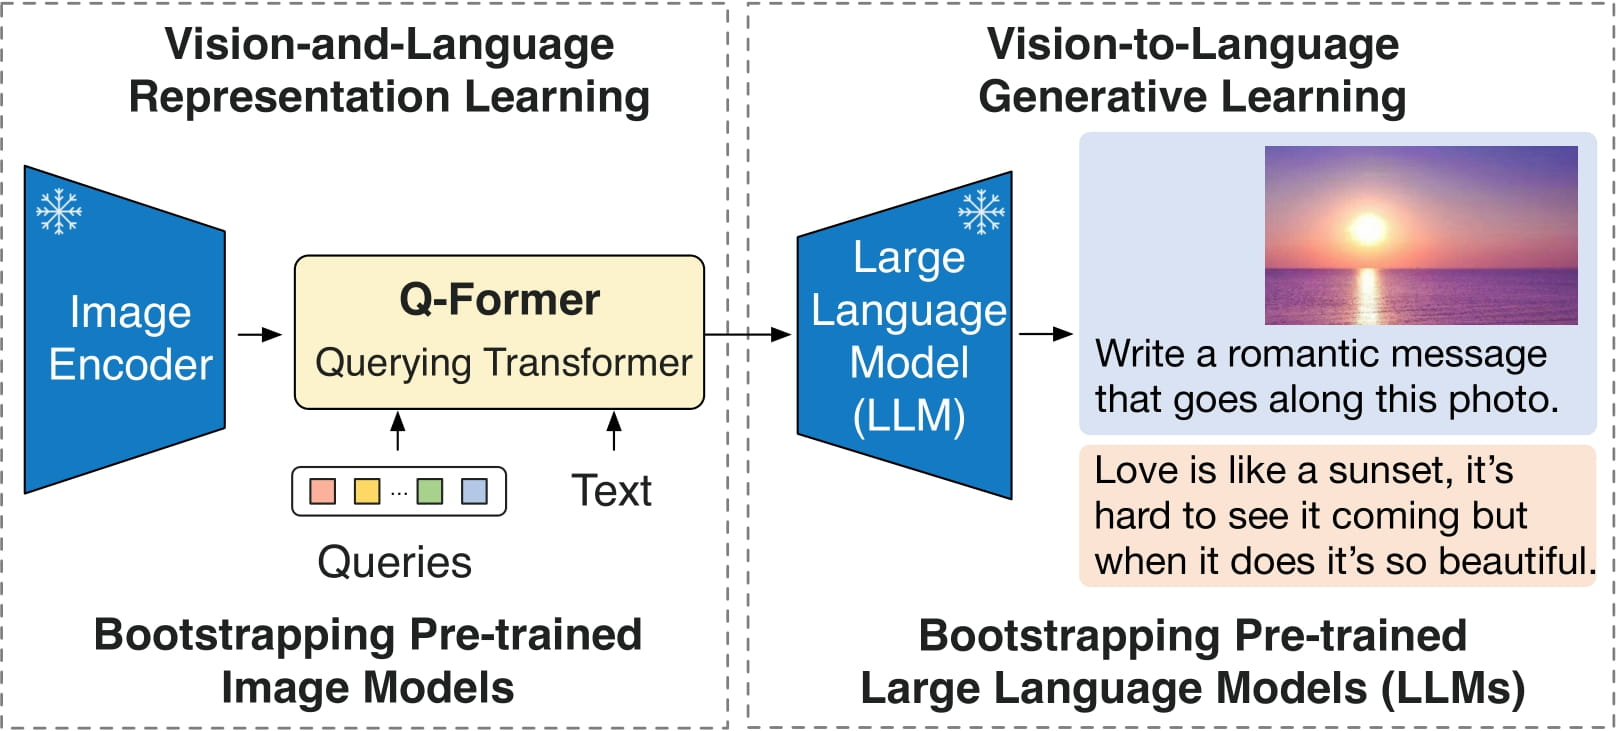

In [13]:
from IPython.display import HTML

Image_Ipython(os.path.join(get_project_dir(), "tutorial", "Week-5", 'blip2_architecture.jpg'), width=750, height=750)

In [14]:
import torch
from PIL import Image
from transformers import Blip2Processor, Blip2ForConditionalGeneration

In [15]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

processor = Blip2Processor.from_pretrained("Salesforce/blip2-opt-2.7b")
model = Blip2ForConditionalGeneration.from_pretrained("Salesforce/blip2-opt-2.7b", torch_dtype=torch.float16, load_in_8bit=True)

# model.to(device)

The `load_in_4bit` and `load_in_8bit` arguments are deprecated and will be removed in the future versions. Please, pass a `BitsAndBytesConfig` object in `quantization_config` argument instead.


RuntimeError: No GPU found. A GPU is needed for quantization.

In [ ]:
image = Image.open(os.path.join(get_project_dir(), "tutorial", "Week-5", "754703591882697477.png")).convert('RGB')

In [ ]:
prompt = "Question: What is in this image? Answer:"

inputs = processor(images=image, text=prompt, return_tensors="pt").to(device, torch.float16)

In [ ]:
outputs = model.generate(**inputs)

In [ ]:
caption = processor.batch_decode(outputs, skip_special_tokens=True)

In [ ]:
caption

In [ ]:
prompt = "a photography of"

inputs = processor(images=image, text=prompt, return_tensors="pt").to(device, torch.float16)

outputs = model.generate(**inputs)

caption = processor.batch_decode(outputs, skip_special_tokens=True)

In [ ]:
caption

In [ ]:
prompt = "an image of"

inputs = processor(images=image, text=prompt, return_tensors="pt").to(device, torch.float16)

outputs = model.generate(**inputs)

caption = processor.batch_decode(outputs, skip_special_tokens=True)

In [ ]:
caption

# Danbooru Tag

- Online Service: https://huggingface.co/spaces/hysts/DeepDanbooru

- The SaaS works with anime character.

- Open Source: wd14_tagging

- https://github.com/corkborg/wd14-tagger-standalone/tree/main

## How to use?

-- git clone https://github.com/corkborg/wd14-tagger-standalone.git

-- conda create -n wd-14 python=3.10

-- pip install -r requirements

-- python run.py --file <filename> --cpu

-- python run.py --dir <dir> --cpu

需要大批量處理的時候，可以先進行小批量測試，然後睡覺前全部扔下去，早上起來看結果就好。

# Florence-2

https://huggingface.co/spaces/gokaygokay/Florence-2